---
title:  "PCA의 원리와 SVD원리는 뭐가 다른 걸까"
excerpt: "eigen decomposition vs sigular value decomposition"

categories:
  - Machine-Learning
tags:
  - PCA
  - EigenDecomposition
  - Dimension reduction
  - Feature extraction
  - Singular Value Decomposition
last_modified_at: 2020-08-15T10:15:00-05:00
---

## Principal component analysis  
### reference  
- PCA 개념관련_01 : https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
- PCA 개념관련_02 : https://darkpgmr.tistory.com/104
- 코드관련 : StatQuest youtube - "PCA in Python" 을 참고하여 진행했다
- 포아송분포관련 blog : https://blog.naver.com/PostView.nhn?blogId=mykepzzang&logNo=220840724901

## Loding Library

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


## Data Generation Code

In [3]:
## load iris
from sklearn.datasets import load_iris
data = load_iris()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
iris = data.data
y_target = data.target
y_target_name = data.target_names

In [5]:
print(data.filename)

C:\ProgramData\Anaconda3\envs\gpu_test\lib\site-packages\sklearn\datasets\data\iris.csv


In [6]:
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [7]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = iris
# Separating out the target
y = y_target
# Standardizing the features
x = StandardScaler().fit_transform(x)

## scikit-learn PCA 의 get_covariance()

In [218]:
pca01 = PCA(n_components=2,svd_solver='full') 
decompose_x_01 = pca01.fit_transform(x)
print(pca01.components_,'\n',"pca01.components_ shape :{}".format(pca01.components_.shape))
print('\n',pca01.explained_variance_)
print('\n',pca01.singular_values_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]] 
 pca01.components_ shape :(2, 4)

 [2.93808505 0.9201649 ]

 [20.92306556 11.7091661 ]


**Compute data covariance with the generative model.**  

cov = components_.T * S^2 * components_ + sigma2 * eye(n_features)  
where S^2 contains the explained variances, and sigma2 contains the noise variances.  

여기서 헷갈리는 설명은 S 가 explained variances 가 아니라, S^2 = explained variances 란 점이다.  
eye : 이거는 numpy 에서, 1을 원소로 하는 대각행렬을 말한다.

```pca01.noise_variance_``` : Equal to the average of (min(n_features, n_samples) - n_components) smallest eigenvalues of the covariance matrix of X.

In [219]:
pca01.noise_variance_

0.08429784161070522

In [220]:
pca01.components_.T.shape

(4, 2)

In [221]:
mat_power_ev.shape

(2, 2)

In [222]:
pca01.components_.shape

(2, 4)

In [223]:
k = np.matmul(pca01.components_.T,np.diag(pca01.explained_variance_))
k2 = np.matmul(k,pca01.components_)
k3 = pca01.noise_variance_ * np.eye(x.shape[1])

In [224]:
k2

array([[ 0.92879058, -0.09170562,  0.89708089,  0.88800724],
       [-0.09170562,  0.99756979, -0.43851133, -0.39013523],
       [ 0.89708089, -0.43851133,  0.99033217,  0.96476019],
       [ 0.88800724, -0.39013523,  0.96476019,  0.94155742]])

In [225]:
k3

array([[0.08429784, 0.        , 0.        , 0.        ],
       [0.        , 0.08429784, 0.        , 0.        ],
       [0.        , 0.        , 0.08429784, 0.        ],
       [0.        , 0.        , 0.        , 0.08429784]])

In [226]:
np.round(k2+k3,6)

array([[ 1.013088, -0.091706,  0.897081,  0.888007],
       [-0.091706,  1.081868, -0.438511, -0.390135],
       [ 0.897081, -0.438511,  1.07463 ,  0.96476 ],
       [ 0.888007, -0.390135,  0.96476 ,  1.025855]])

In [227]:
np.round(pca01.get_covariance(),6)

array([[ 0.978193, -0.10925 ,  0.870807,  0.861066],
       [-0.10925 ,  1.00389 , -0.427239, -0.38252 ],
       [ 0.870807, -0.427239,  1.046181,  0.936985],
       [ 0.861066, -0.38252 ,  0.936985,  0.998581]])

#### 위의 과정으로 Full componet 값으로 분해하면, 동일한 값이 나왔음을 알 수 있다.  
feature 를 줄이면, noise 값에 의해, 완벽히 똑같지는 않다. (4일때는 완벽히 똑같다.)

## PCA doc에는 SVD가 언급되는 이유와 실제 비교  
<span style='color:blue'>Scikit-Learn에서는 PCA를 계산할 때, 데이터셋에 대한 공분산의 고유값 분해(eigenvalue-decomposition)이 아닌 특이값 분해(SVD, Singular Value Decomposition)를 이용해 계산한다.</span>  

출처: https://excelsior-cjh.tistory.com/167 [EXCELSIOR]  

이유는 stackoverflow에서 확인할 수 있듯이, eigenvalue-decomposition에서는 공분산 행렬을 메모리상에 가지고 있어야하는 반면 SVD는 공분산 행렬을 따로 메모리에 저장할 필요가 없으므로 효율적이기 때문이다.

In [8]:
print(x.shape)

(150, 4)


```PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)```

위 값은 default 값이다. 따라서, 아래의 svd_solver 는 auto로 적용되었다.  
헌데, svd_solver로 이름 붙인 이유가 뭘까?

```svd_solver : {‘auto’, ‘full’, ‘arpack’, ‘randomized’}```  
__auto==default__  
- The solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.  

__full__
- run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing  

__arpack__  
- run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < min(X.shape)  

__randomized__  
- run randomized SVD by the method of Halko et al.  

In [58]:
from sklearn.decomposition import PCA
pca00 = PCA(n_components=2,svd_solver='auto') ## 상기 조건1:(data 500 * 500) & 조건2:(data 80% 이하로 축소하는 경우) 를 만족시키지 못했기 대문에 'full SVD' 가 계산된다.
principalComponents = pca00.fit_transform(x)
print(pca00.components_,'\n',"pca00.components_ shape :{}".format(pca00.components_.shape))
print('\n',pca00.explained_variance_)
print('\n',pca00.singular_values_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]] 
 pca00.components_ shape :(2, 4)

 [2.93808505 0.9201649 ]

 [20.92306556 11.7091661 ]


In [59]:
pca01 = PCA(n_components=2,svd_solver='full') 
decompose_x_01 = pca01.fit_transform(x)
print(pca01.components_,'\n',"pca01.components_ shape :{}".format(pca01.components_.shape))
print('\n',pca01.explained_variance_)
print('\n',pca01.singular_values_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]] 
 pca01.components_ shape :(2, 4)

 [2.93808505 0.9201649 ]

 [20.92306556 11.7091661 ]


In [61]:
pca02 = PCA(n_components=2,svd_solver='arpack')
decompose_x_02 = pca02.fit_transform(x)
print(pca02.components_,'\n',"pca02.components_ shape :{}".format(pca02.components_.shape))
print('\n',pca02.explained_variance_)
print('\n',pca02.singular_values_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]] 
 pca02.components_ shape :(2, 4)

 [2.93808505 0.9201649 ]

 [20.92306556 11.7091661 ]


In [62]:
pca03 = PCA(n_components=2,svd_solver='randomized')
decompose_x_03 = pca03.fit_transform(x)
print(pca03.components_,'\n',"pca03.components_ shape :{}".format(pca03.components_.shape))
print('\n',pca03.explained_variance_)
print('\n',pca03.singular_values_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]] 
 pca03.components_ shape :(2, 4)

 [2.93808505 0.9201649 ]

 [20.92306556 11.7091661 ]


svd_solver option 를 모두 했을때 결과는 일단 동일하다는 것을 알 수 있다.  

## numpy.linalg 라이브러리를 활용했을때, 동일한 결과를 얻는지 확인해보자!!

#### np.linalg.eig 활용하기

In [228]:
pca04 = PCA(n_components=4,svd_solver='full')
decompose_x_04 = pca04.fit_transform(x)

In [230]:
eigenvalue, eigenvector = np.linalg.eig(np.cov(x.transpose()))
explained_variance_ratio_sum_ = np.cumsum(pca04.explained_variance_ratio_)

In [231]:
index = eigenvalue.argsort()[::-1]
eigenvalue = eigenvalue[index]
eigenvector = eigenvector[:, index]

In [233]:
eigenvalue

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [234]:
eigenvector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [235]:
pca04.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [236]:
pca04.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

동일하다

#### np.linalg.svd 활용하기

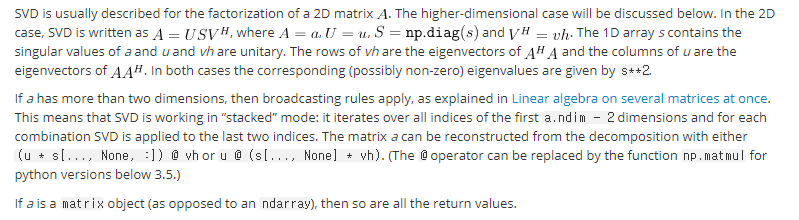

In [270]:
## scipy.sparse.linalg 와 numpy 의 linalg 는 다르다. 구분해서 사용하자.

u, s, vh = np.linalg.svd(x,full_matrices=True)
## u :  left singular vectors
## s : The singular values.
## vh : right singular vectors as rows

In [257]:
print(u.shape,s.shape,vt.shape)

(150, 150) (4,) (4, 4)


In [260]:
print('singular value :', s)
print('right singular vector :\n', vh.T)

singular value : [20.92306556 11.7091661   4.69185798  1.76273239]
right singular vector :
 [[ 0.52106591 -0.37741762  0.71956635  0.26128628]
 [-0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [261]:
print(pca04.explained_variance_) ## eigen decomp 의 고유치
print(pca04.singular_values_) ## sigular value 는 자동으로 구해진다. 또한 동일함을 알 수 있다.

[2.93808505 0.9201649  0.14774182 0.02085386]
[20.92306556 11.7091661   4.69185798  1.76273239]


#### 원본 x 를 재구성하기

In [271]:
## 행렬A 를 구하고, np.dot(A,A.T) 하면 x 가 나올것이다. 단, svd 분해에서 thin 으로 나오기 때문에, s 에 대해 약간의 변형이 필요하다.
## A 구하기
smat = np.zeros((150, 4), dtype=complex)
smat[:4, :4] = np.diag(s)

In [272]:
print(u.shape,s.shape,smat.shape,vt.shape)

(150, 150) (4,) (150, 4) (4, 4)


In [274]:
back_x = np.matmul(u,smat)
back_x = np.matmul(back_x,vt)

In [279]:
print(back_x.shape)
np.round(back_x[0:2],4)

(150, 4)


array([[-0.9007+0.j,  1.019 +0.j, -1.3402+0.j, -1.3154+0.j],
       [-1.143 +0.j, -0.132 +0.j, -1.3402+0.j, -1.3154+0.j]])

In [280]:
x[0:2]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

동일한 결과를 보여주는 것을 알 수 있다.